# Binding energy metrics

In this notebook, we plot all figures of the main paper related to the binding energy metrics, including the shape space, competition energies and so on.

In [1]:
import itertools
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from scipy import stats

df = pd.read_csv('../data/binding.csv', index_col=0)

/home/dskoda/.conda/envs/htvs/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Defining a few useful functions

Below, we start defining a few useful functions and parameters to help us plot more eficiently.

In [2]:
def get_literature_markers(in_literature):
    if in_literature == 1.0:
        return '^'
    return 'o'

def mscatter(x, y, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers

    ax = ax or plt.gca()
    sc = ax.scatter(x, y, **kw)

    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

grid_kws = {"width_ratios": (0.45, 0.45, .02), "hspace": .3}

In [3]:
cmap = 'inferno_r'
scatter_kws = {
    'linewidths': 0.7,
    'edgecolors': 'k',
    's': 60,
}

alphamap = mpl.colors.ListedColormap(
    np.array([
        [0, 0, 0, 0],
    ])
)

In [4]:
def plot_osda_annot(ax, d, norm, osdas, color_option, cmap=cmap):
    for i, sp in osdas.items():
        sp_data = d.loc[d['SMILES'] == sp].iloc[0]
        ax.scatter(
            [sp_data[x]],
            [sp_data[y]],
            c=[sp_data[color_option]],
            s=SIZE,
            norm=norm,
            linewidths=LINEWIDTH,
            edgecolors='k',
            cmap=cmap,
            marker='s',
        )
        ax.annotate(
            str(i),
            (sp_data[x], sp_data[y]),
            zorder=3,
            ha='center',
            va='center',
            fontsize=12,
        )

## Figure 2: AEI

Here, we plot the binding metrics for AEI zeolite.

In [5]:
osdas = {
    '1': 'CC[N+]1(C)C(C)(C)CCCC1(C)C',
    '2': 'CC[N+]1(CC)[C@H](C)CCC[C@H]1C',
    '3': 'CN(C)[P+](C)(N(C)C)N(C)C',
    '4': 'CC[P+](CC)(CC)CC',
}

SIZE = 350
LINEWIDTH = 2.5

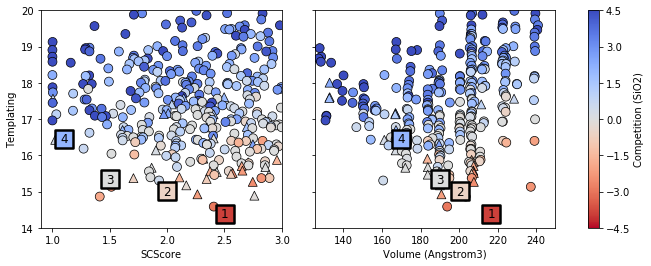

In [6]:
color_option = 'Competition (SiO2)'
zeolite = 'AEI'

grid_kws = {"width_ratios": (0.45, 0.45, .02), "hspace": .3}
fig, ax_fig = plt.subplots(1, 3, figsize=(10, 4), gridspec_kw=grid_kws)

y = 'Templating'
YLIM = [14, 20.00001]
SCS_LIMS = [0.9, 3.0]
VOL_LIMS = [125, 250]

S = 80
SIZE = 350
LINEWIDTH = 2.5

d = df.loc[
    (df['Zeolite'] == zeolite)
    & (~df['SMILES'].str.contains('O'))
    & (df['SMILES'].str.contains('+', regex=False))
    & (df[y] > YLIM[0])
    & (df[y] < YLIM[1])
    & (df['SCScore'] > SCS_LIMS[0])
    & (df['SCScore'] < SCS_LIMS[1])
    & (df['Volume (Angstrom3)'] > VOL_LIMS[0])
    & (df['Volume (Angstrom3)'] < VOL_LIMS[1])
].sort_values('Templating', ascending=False)

color_values = (d[color_option]).values.clip(min=-4.5, max=4.5)

norm = mpl.colors.Normalize(vmin=-4.5, vmax=4.5)
cmap = 'coolwarm_r'
# color = cm.coolwarm_r(norm(color_values))

markers = d['In literature?'].apply(get_literature_markers).values.tolist()


ax = ax_fig[0]
x = 'SCScore'

scat2 = mscatter(
    d[x],
    d[y],
    ax=ax,
    c=color_values,
    m=markers,
    norm=norm,
    s=S,
    linewidths=0.7,
    edgecolors='k',
    cmap=cmap,
)

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_xlim(SCS_LIMS)
ax.set_ylim(YLIM)
ax.set_yticks(np.arange(*YLIM))

for i, sp in osdas.items():
    spiro_data = d.loc[d['SMILES'] == sp].iloc[0]
    ax.scatter(
        [spiro_data[x]],
        [spiro_data[y]],
        c=[spiro_data[color_option]],
        s=SIZE,
        norm=norm,
        linewidths=LINEWIDTH,
        edgecolors='k',
        cmap=cmap,
        marker='s',
    )
    ax.annotate(
        str(i),
        (spiro_data[x], spiro_data[y]),
        zorder=3,
        ha='center',
        va='center',
        fontsize=12,
    )
    
ax = ax_fig[1]
x = 'Volume (Angstrom3)'

scat1 = mscatter(
    d[x],
    d[y],
    ax=ax,
    c=color_values,
    m=markers,
    s=S,
    norm=norm,
    linewidths=0.7,
    edgecolors='k',
    cmap=cmap,
)

ax.set_xlabel(x)
ax.set_xlim([125, 250])
ax.set_ylim(YLIM)
ax.set_yticks(np.arange(*YLIM))
ax.set_yticklabels([])

for i, sp in osdas.items():
    spiro_data = d.loc[d['SMILES'] == sp].iloc[0]
    ax.scatter(
        [spiro_data[x]],
        [spiro_data[y]],
        c=[spiro_data[color_option]],
        s=SIZE,
        norm=norm,
        linewidths=LINEWIDTH,
        edgecolors='k',
        cmap=cmap,
        marker='s',
    )
    ax.annotate(
        str(i),
        (spiro_data[x], spiro_data[y]),
        zorder=3,
        ha='center',
        va='center',
        fontsize=12,
    )

ax = ax_fig[2]
cbar = fig.colorbar(scat1, cax=ax)
cbar.set_label(color_option)
cbar.set_ticks(np.arange(-4.5, 4.6, 1.5))

plt.show()

# Exporting the tabulated data
d[['Zeolite', 'SMILES', 'Templating', 'SCScore', 'Volume (Angstrom3)', 'In literature?']].to_csv('../data/fig2/fig2DE.csv')

/home/dskoda/.conda/envs/htvs/lib/python3.7/site-packages/ipykernel_launcher.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


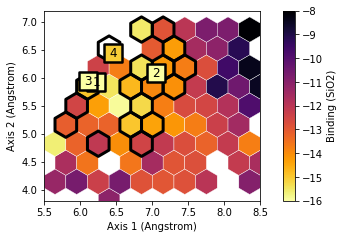

In [7]:
color_option = 'Binding (SiO2)'
cmap = 'inferno_r'

norm = mpl.colors.Normalize(vmin=-18, vmax=0)
grid_kws = {"width_ratios": (.90, .05), "hspace": .3}

fig, ax_fig = plt.subplots(1, 2, figsize=(4.5, 3.5), gridspec_kw=grid_kws)

ax = ax_fig[0]

x = 'Axis 1 (Angstrom)'
y = 'Axis 2 (Angstrom)'

XLIM2 = [5.5, 8.5]
YLIM2 = [3.8, 7.2]

d = df.loc[
    (df['Zeolite'] == zeolite)
    & (df[x] > XLIM2[0])
    & (df[x] < XLIM2[1])
    & (df[y] > YLIM2[0])
    & (df[y] < YLIM2[1])
].sort_values('Templating', ascending=False)

color = d[color_option]
markers = d['In literature?'].apply(get_literature_markers).values.tolist()

norm = mpl.colors.Normalize(vmin=-16, vmax=-8)

scat2 = ax.hexbin(
    d[x],
    d[y],
    C=d[color_option],
    mincnt=1,
    gridsize=10,
    reduce_C_function=np.mean,
    cmap=cmap,
    norm=norm,
    extent=(XLIM2 + YLIM2),
    linewidths=0.4,
    edgecolors='w',
)

## Plotting the literature
subd = d[d['Zeolite composition?']]

hb = ax.hexbin(
    subd[x],
    subd[y],
    gridsize=10,
    mincnt=1,
    cmap=alphamap,
    norm=plt.Normalize(vmin=0, vmax=1),
    extent=(*XLIM2, *YLIM2),
    linewidths=3,
    edgecolors='k',
)

plot_osda_annot(ax, d, norm, osdas=osdas, cmap=cmap, color_option=color_option)

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_xlim(XLIM2)
ax.set_ylim(YLIM2)

ax.set_xticks(np.arange(XLIM2[0], XLIM2[1] + 0.1, 0.5))

ax = ax_fig[1]
cbar = fig.colorbar(scat2, cax=ax)
ax.set_ylabel(color_option)


fig.tight_layout()
plt.show()

d[[x, y, color_option, 'In literature?']].to_csv('../data/fig2/fig2C.csv')

## Figure 3: CHA

Here, we plot the data for CHA zeolite

In [8]:
osdas = {
    '5': 'C[N+](C)(C)C12CC3CC(CC(C3)C1)C2',
    '6': 'C[N+](C)(C)C1CCCCC1',
    '7': 'CC[N+](C)(C)C1CCCCC1',
    '8': 'CC[N+](C)(CC)C1CCCCC1',
    '9': 'CC[N+](CC)(CC)CC',
    '10': 'C1CC[N+]2(C1)CCCC2',
    '11': 'C1CC[N+]2(CC1)CCCCC2',
    '12': 'C1CCC[N+]2(CC1)CCCCC2',
    '13': 'C1CCC[N+]2(CC1)CCCCCC2',
}

SIZE = 350
LINEWIDTH = 2.5

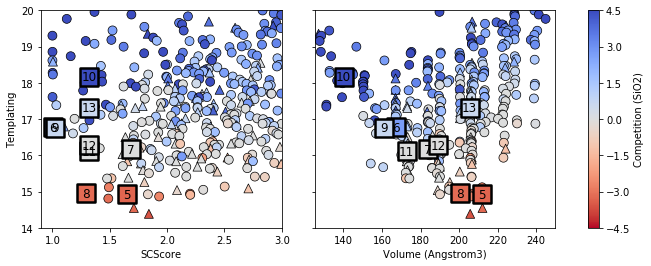

In [9]:
color_option = 'Competition (SiO2)'
zeolite = 'CHA'

grid_kws = {"width_ratios": (0.45, 0.45, .02), "hspace": .3}
fig, ax_fig = plt.subplots(1, 3, figsize=(10, 4), gridspec_kw=grid_kws)

y = 'Templating'
YLIM = [14, 20.00001]
SCS_LIMS = [0.9, 3.0]
VOL_LIMS = [125, 250]

S = 80
SIZE = 350
LINEWIDTH = 2.5

d = df.loc[
    (df['Zeolite'] == zeolite)
    & (~df['SMILES'].str.contains('O'))
    & (df['SMILES'].str.contains('+', regex=False))
    & (df[y] > YLIM[0])
    & (df[y] < YLIM[1])
    & (df['SCScore'] > SCS_LIMS[0])
    & (df['SCScore'] < SCS_LIMS[1])
    & (df['Volume (Angstrom3)'] > VOL_LIMS[0])
    & (df['Volume (Angstrom3)'] < VOL_LIMS[1])
].sort_values('Templating', ascending=False)

color_values = (d[color_option]).values.clip(min=-4.5, max=4.5)

norm = mpl.colors.Normalize(vmin=-4.5, vmax=4.5)
cmap = 'coolwarm_r'
# color = cm.coolwarm_r(norm(color_values))

markers = d['In literature?'].apply(get_literature_markers).values.tolist()


ax = ax_fig[0]
x = 'SCScore'

scat2 = mscatter(
    d[x],
    d[y],
    ax=ax,
    c=color_values,
    m=markers,
    norm=norm,
    s=S,
    linewidths=0.7,
    edgecolors='k',
    cmap=cmap,
)

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_xlim(SCS_LIMS)
ax.set_ylim(YLIM)
ax.set_yticks(np.arange(*YLIM))

for i, sp in osdas.items():
    spiro_data = d.loc[d['SMILES'] == sp].iloc[0]
    ax.scatter(
        [spiro_data[x]],
        [spiro_data[y]],
        c=[spiro_data[color_option]],
        s=SIZE,
        norm=norm,
        linewidths=LINEWIDTH,
        edgecolors='k',
        cmap=cmap,
        marker='s',
    )
    ax.annotate(
        str(i),
        (spiro_data[x], spiro_data[y]),
        zorder=3,
        ha='center',
        va='center',
        fontsize=12,
    )
    
ax = ax_fig[1]
x = 'Volume (Angstrom3)'

scat1 = mscatter(
    d[x],
    d[y],
    ax=ax,
    c=color_values,
    m=markers,
    s=S,
    norm=norm,
    linewidths=0.7,
    edgecolors='k',
    cmap=cmap,
)

ax.set_xlabel(x)
ax.set_xlim([125, 250])
ax.set_ylim(YLIM)
ax.set_yticks(np.arange(*YLIM))
ax.set_yticklabels([])

for i, sp in osdas.items():
    spiro_data = d.loc[d['SMILES'] == sp].iloc[0]
    ax.scatter(
        [spiro_data[x]],
        [spiro_data[y]],
        c=[spiro_data[color_option]],
        s=SIZE,
        norm=norm,
        linewidths=LINEWIDTH,
        edgecolors='k',
        cmap=cmap,
        marker='s',
    )
    ax.annotate(
        str(i),
        (spiro_data[x], spiro_data[y]),
        zorder=3,
        ha='center',
        va='center',
        fontsize=12,
    )

ax = ax_fig[2]
cbar = fig.colorbar(scat1, cax=ax)
cbar.set_label(color_option)
cbar.set_ticks(np.arange(-4.5, 4.6, 1.5))

plt.show()

# Exporting the tabulated data
d[['Zeolite', 'SMILES', 'Templating', 'SCScore', 'Volume (Angstrom3)', 'In literature?']].to_csv('../data/fig3/fig3CD.csv')

/home/dskoda/.conda/envs/htvs/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


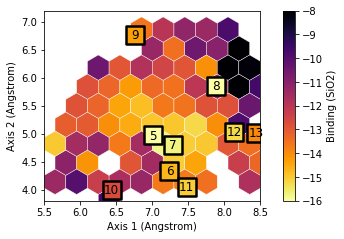

In [10]:
color_option = 'Binding (SiO2)'
cmap = 'inferno_r'

norm = mpl.colors.Normalize(vmin=-18, vmax=0)
grid_kws = {"width_ratios": (.90, .05), "hspace": .3}

fig, ax_fig = plt.subplots(1, 2, figsize=(4.5, 3.5), gridspec_kw=grid_kws)

ax = ax_fig[0]

x = 'Axis 1 (Angstrom)'
y = 'Axis 2 (Angstrom)'

XLIM2 = [5.5, 8.5]
YLIM2 = [3.8, 7.2]

d = df.loc[
    (df['Zeolite'] == zeolite)
    & (df[x] > XLIM2[0])
    & (df[x] < XLIM2[1])
    & (df[y] > YLIM2[0])
    & (df[y] < YLIM2[1])
].sort_values('Templating', ascending=False)

color = d[color_option]
markers = d['In literature?'].apply(get_literature_markers).values.tolist()

norm = mpl.colors.Normalize(vmin=-16, vmax=-8)

scat2 = ax.hexbin(
    d[x],
    d[y],
    C=d[color_option],
    mincnt=1,
    gridsize=10,
    reduce_C_function=np.mean,
    cmap=cmap,
    norm=norm,
    extent=(XLIM2 + YLIM2),
    linewidths=0.4,
    edgecolors='w',
)

plot_osda_annot(ax, d, norm, osdas=osdas, cmap=cmap, color_option=color_option)

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_xlim(XLIM2)
ax.set_ylim(YLIM2)

ax.set_xticks(np.arange(XLIM2[0], XLIM2[1] + 0.1, 0.5))

ax = ax_fig[1]
cbar = fig.colorbar(scat2, cax=ax)
ax.set_ylabel(color_option)

# cbar.set_ticks([-10, -12, -14, -16])

fig.tight_layout()
plt.show()

d[[x, y, color_option]].to_csv('../data/fig3/fig3B.csv')

## Figure 4: Intergrowth

Finally, we plot the binding metrics related to the CHA/AEI intergrowth

In [11]:
osdas = {
    '1': 'CC[N+]1(C)C(C)(C)CCCC1(C)C',
    '3': 'CN(C)[P+](C)(N(C)C)N(C)C',
    '5': 'C[N+](C)(C)C12CC3CC(CC(C3)C1)C2',
    '12': 'C1CCC[N+]2(CC1)CCCCC2',
    '14': 'CC[N+](C)(C(C)C)C(C)C',
}

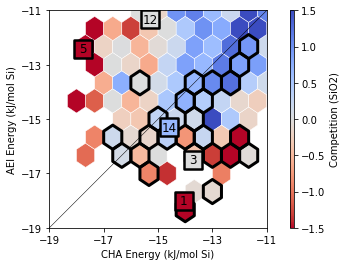

In [12]:
color_option = 'Competition (SiO2)'
zeolites = ['CHA', 'AEI']
LIMS = [-19, -11]
SIZE = 350
LINEWIDTH = 2.5

TICKS = np.arange(LIMS[0], LIMS[1] + 1e-4, 2)

d = df.loc[
    (df['Zeolite'].isin(zeolites))
    & (~df['SMILES'].str.contains('O'))
    & (df['Binding (SiO2)'] < LIMS[1])
]

d_atoms = d.pivot(index='SMILES', columns='Zeolite', values='Binding (SiO2)').dropna()
d_comp = d.pivot(index='SMILES', columns='Zeolite', values='Competition (SiO2)').dropna()
d_lit = d.pivot(index='SMILES', columns='Zeolite', values='In literature?').dropna()
d_lit_zeo = d.pivot(index='SMILES', columns='Zeolite', values='Zeolite composition?').dropna()

color_values = d_comp.min(axis=1).values.clip(min=-1.5, max=1.5)

norm = mpl.colors.Normalize(vmin=-color_values.max(), vmax=color_values.max())
cmap = cm.coolwarm_r
color = cm.coolwarm_r(norm(color_values))
grid_kws = {"width_ratios": (.95, .02), "hspace": .3}

markers = d_lit.max(axis=1).apply(get_literature_markers).values.tolist()

fig, ax_fig = plt.subplots(1, 2, figsize=(4.4, 4), gridspec_kw=grid_kws)

ax = ax_fig[0]
x = 'CHA'
y = 'AEI'

scat1 = ax.hexbin(
    d_atoms[x],
    d_atoms[y],
    C=color_values,
    gridsize=12,
    cmap=cmap,
    norm=norm,
    linewidths=0.5,
    edgecolors='w',
    extent=(*LIMS, *LIMS),
)

ax.set_xlabel(f'{x} Energy (kJ/mol Si)')
ax.set_ylabel(f'{y} Energy (kJ/mol Si)')

ax.set_xlim(LIMS)
ax.set_ylim(LIMS)
ax.set_xticks(TICKS)
ax.set_yticks(TICKS)

for i, sp in osdas.items():
    if sp not in d_atoms.index:
        continue

    species_data = d_atoms.loc[sp]
    c = cmap(norm(d_comp.loc[sp].min()))
    
    ax.scatter(
        [species_data[x]],
        [species_data[y]],
        c=[c],
        s=SIZE,
        linewidths=LINEWIDTH,
        edgecolors='k',
        marker='s',
        zorder=2,
    )
    ax.annotate(
        f'{i}',
        (species_data[x], species_data[y]),
        ha='center',
        va='center',
        fontsize=12
    )

ax.plot(LIMS, LIMS, 'k', zorder=1, linewidth=0.5)
ax.set_aspect('equal')

aei_lit = d_atoms.loc[
    (d_lit['AEI'] == 1)
    & (d_lit_zeo['AEI'])
]

hb = ax.hexbin(
    aei_lit[x],
    aei_lit[y],
    gridsize=12,
    mincnt=1,
    cmap=alphamap,
    norm=plt.Normalize(vmin=0, vmax=1),
    extent=(*LIMS, *LIMS),
    linewidths=3,
#     alpha=0.5,
    edgecolors='k',
#     color=(0, 0, 0, 0),
#     zorder=-1,
)

ax = ax_fig[1]
cbar = fig.colorbar(scat1, cax=ax)
cbar.set_label(color_option)

plt.show()

d_atoms['color'] = color_values
d_atoms.to_csv('../data/fig4/fig4A.csv')

/home/dskoda/.conda/envs/htvs/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


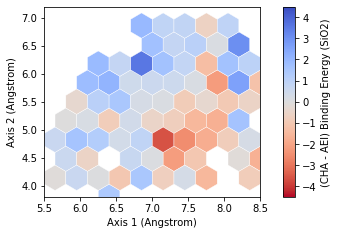

In [13]:
color_option = 'diff'
cmap = 'coolwarm_r'

norm = mpl.colors.Normalize(vmin=-18, vmax=0)
grid_kws = {"width_ratios": (.90, .05), "hspace": .3}

fig, ax_fig = plt.subplots(1, 2, figsize=(4.5, 3.5), gridspec_kw=grid_kws)

ax = ax_fig[0]

x = 'Axis 1 (Angstrom)'
y = 'Axis 2 (Angstrom)'

XLIM2 = [5.5, 8.5]
YLIM2 = [3.8, 7.2]

d = df.loc[
    (df['Zeolite'].isin(['CHA', 'AEI']))
    & (df[x] > XLIM2[0])
    & (df[x] < XLIM2[1])
    & (df[y] > YLIM2[0])
    & (df[y] < YLIM2[1])
].sort_values('Templating', ascending=False)

shape = df[['SMILES', x, y]].drop_duplicates().set_index('SMILES')
binding = d.pivot(index='SMILES', columns='Zeolite', values='Binding (SiO2)')
binding['diff'] = binding['CHA'] - binding['AEI']

binding[x] = shape.reindex(binding.index)[x]
binding[y] = shape.reindex(binding.index)[y]

norm = mpl.colors.Normalize(vmin=-4.5, vmax=4.5)

scat2 = ax.hexbin(
    binding[x],
    binding[y],
    C=binding['diff'],
    mincnt=1,
    gridsize=10,
    reduce_C_function=np.mean,
    cmap=cmap,
    norm=norm,
    extent=(XLIM2 + YLIM2),
    linewidths=0.4,
    edgecolors='w',
)

# plot_osda_annot(ax, d, norm, osdas=osdas, cmap=cmap, color_option=color_option)

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_xlim(XLIM2)
ax.set_ylim(YLIM2)

ax.set_xticks(np.arange(XLIM2[0], XLIM2[1] + 0.1, 0.5))

ax = ax_fig[1]
cbar = fig.colorbar(scat2, cax=ax)
ax.set_ylabel('(CHA - AEI) Binding Energy (SiO2)')

fig.tight_layout()
plt.show()

binding[[x, y, 'diff']].to_csv('../data/fig4/fig4B.csv')